# **Exploratory Data Analysis:**
### **Goal:**
1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

### **Final Deliverables:**
- Create Jupyter Notebooks (showcasing core skills in Python).
- Create a summary page (via README.md) capturing your findings.
- Share this project via GitHub & LinkedIn.

### **Questions to Answer:**
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

In [7]:
import ast
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datasets import load_dataset
%matplotlib inline

In [2]:
# Loading data
datasets = load_dataset('lukebarousse/data_jobs')
datasets

DatasetDict({
    train: Dataset({
        features: ['job_title_short', 'job_title', 'job_location', 'job_via', 'job_schedule_type', 'job_work_from_home', 'search_location', 'job_posted_date', 'job_no_degree_mention', 'job_health_insurance', 'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg', 'company_name', 'job_skills', 'job_type_skills'],
        num_rows: 785741
    })
})

In [6]:
df = datasets['train'].to_pandas()
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [9]:
# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_plot = df['job_title_short'].value_counts().to_frame()
df_plot

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


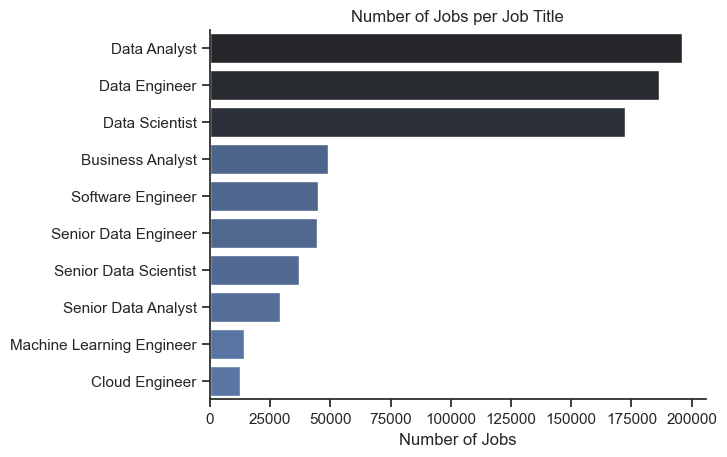

In [14]:
sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_title_short', hue = 'count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Countries to Explore

In [17]:
df_plot = df['job_country'].value_counts().to_frame().head(20)
df_plot

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


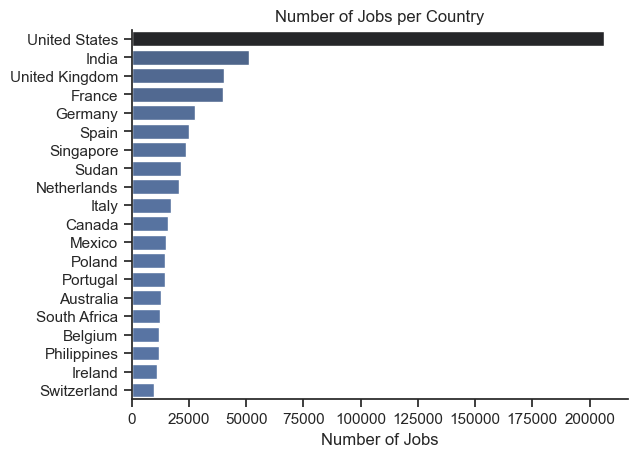

In [18]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Companies to Explore


In [20]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)
df_plot

,count
company_name,
Booz Allen Hamilton,2879
Dice,2827
Harnham,2547
Insight Global,2254
Citi,2164
Confidenziale,2040
Listopro,1984
Capital One,1946
Walmart,1863


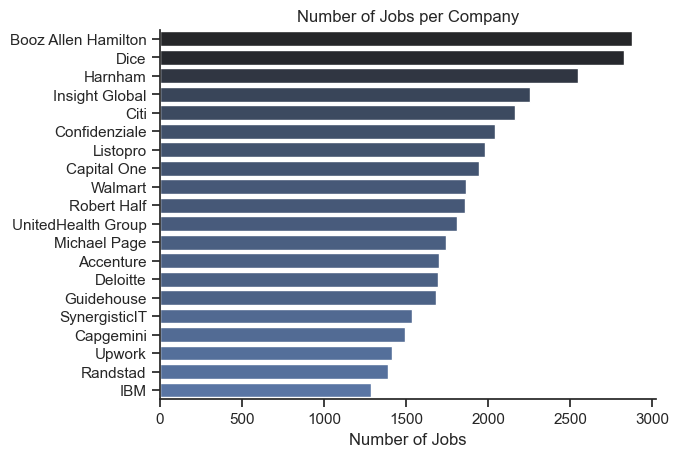

In [21]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities

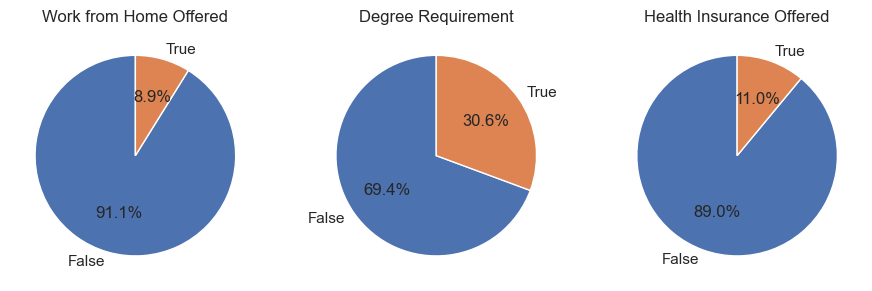

In [22]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

Exploratory Data Analysis for Data Analysts in the India

In [23]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\anoop\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Jul 18 14:12:21 2024).


Filter for India Data Analyst roles

In [29]:
df_india_da = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]
df_india_da

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


Locations to Explore:


In [31]:

df_plot = df_india_da['job_location'].value_counts().head(10).to_frame()

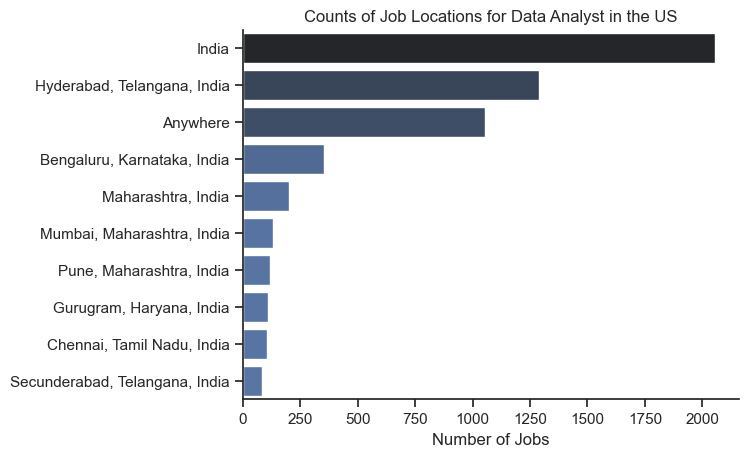

In [32]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities

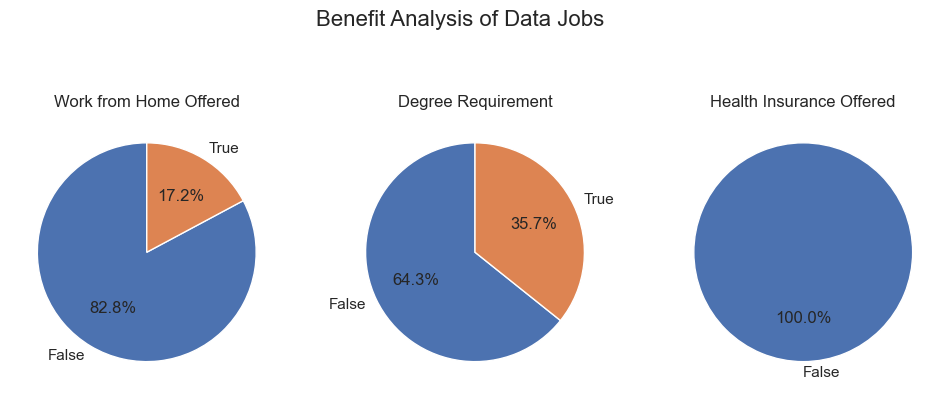

In [37]:
import matplotlib.pyplot as plt

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_india_da[column].value_counts()
    labels = value_counts.index.astype(str)
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)  # Use suptitle instead of subtitle
plt.show()


Companies to Explore:


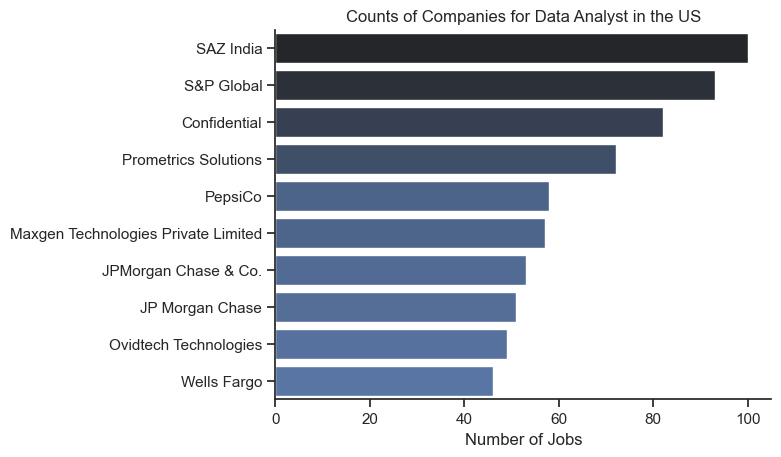

In [38]:
df_plot = df_india_da['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()